<a href="https://colab.research.google.com/github/prof-Thiago-Nunes/Projetos-data-science-/blob/main/Avalia%C3%A7%C3%A3o_de_risco_de_cr%C3%A9dito_da_Nubank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*by Professor Thiago Nunes*

---

# Avaliação de Risco de Crédito da Nubank

## Introdução
A análise de risco de crédito é um dos mais importantes processos financeiros para qualquer empresa. É uma forma essencial de avaliar os possíveis riscos envolvidos na concessão de crédito a clientes e fornecedores, permitindo que as organizações tomem decisões bem fundamentadas sobre quem receberá ou não financiamento.

Uma das principais vantagens da análise do risco de crédito é que ela oferece às empresas informações detalhadas sobre seus potenciais clientes e fornecedores, permitindo que elas façam escolhas baseadas nas melhores práticas disponíveis. A análise permite também identificar fatores como a saúde financeira atual, histórico creditício e outras características específicas relacionadas à solvabilidade do tomador. Esta informação pode ser usada para determinar qual o limite ideal para cada transação ou contrato realizado com um cliente ou fornecedor particular. Além disso, pode ser usada com sucesso para prever eventuais perdas decorrentes deste tipo de operação financeira.

Outra grande vantagem da análise do risco de crédito é que ela permite às organizações controlarem melhor seus custos operacionais associados a este tipo específico de transacionalidade financeira. Isso acontece porque as entidades conseguem estabelecer limites precisos quantitativamente e qualitativamente nos valores concedidos aos seus clientes e fornecedores. Desta forma, elas evitam perdas desnecessárias que poderiam ser causadas por erros na concessão de crédito ou pelos riscos associados a este tipo de transacionalidade financeira.

<p align=center>
  <img src="https://mir-s3-cdn-cf.behance.net/projects/404/f4b317145922057.Y3JvcCw4MDgsNjMyLDAsMA.png" width="50%">
</p>
 
Grandes bancos e Fintechs têm apostado cada vez mais em modelos de *Machine Learning* para previnir a inadimplência de alguns clientes.

Dentre as principais instituições financeira, o [Nubank](https://nubank.com.br/sobre-nos) é uma das que mais tem se destacado no uso de Inteligência Artificial e times de *Data Science*.

O conjunto de dados a ser utilizado neste Projeto de *Data Science* parte de uma competição realizada pela Startup [Nubank](https://nubank.com.br/sobre-nos) a fim de revelar talentos e potenciais contratações pela Fintech.

## Contextualização do Problema


Nubank é uma empresa brasileira de tecnologia financeira que foi fundada em 2013 por David Vélez e seus três sócios. O objetivo da Nubank é oferecer serviços financeiros modernos, inovadores e acessíveis para os consumidores brasileiros. A Nubank tem como principal produto um cartão de crédito sem anuidade que pode ser controlado inteiramente pelo smartphone do usuário. Além disso, a empresa também oferece conta corrente digital, linhas de crédito e financiamentos. 

Atualmente, a Nubank já possui mais de 8 milhões de clientes ativos no Brasil e está presente nos Estados Unidos, Colômbia e México.

O objetivo deste projeto é prever qual a probabilidade de um cliente da Startup Nubank não coumprir com suas obrigações financeiras e deixar de pagar a sua fatura do Cartão de Crédito.

<p align=center>
  <img src="https://mir-s3-cdn-cf.behance.net/projects/404/8f4254128126513.Y3JvcCwxMDcxLDgzOCwwLDA.png" width="50%">
</p>
  
Vale ressaltar que essa avaliação deve ser realizada no momento em que o cliente solicita o cartão (normalmente no primeiro contato com a instituição).



> OBJETIVO: Criar um modelo que forneça a probabilidade de um cliente virar inadimplente.


Espera-se que um modelo seja capaz de minimizar as perdas financeiras do Nubank, porém minimizando também os falsos positivos.

### Hipóteses Iniciais

* Score baixo pode ser sinal de possível inadiplência 

* Solicitar empréstimos pode mostrar um panorâma financeiro do cliente

### Importando as bibliotecas necessárias

In [74]:
!pip install scikit-plot -q
!pip install category_encoders -q

In [125]:
# importar os pacotes necessários
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import pandas as pd
import scikitplot as skplt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, f1_score, precision_score, confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_predict
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
import category_encoders as ce
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from scikitplot.metrics import plot_confusion_matrix, plot_roc

# Importando o método SimpleImputer para preencher valores ausentes
from sklearn.impute import SimpleImputer

# random seed
np.random.seed(42)

# definir o estilo do seaborn para os plots
sns.set_style()

# filtrar mensagens de warning
import warnings
warnings.filterwarnings('ignore')

# Mostrar todas as colunas
pd.set_option('display.max_columns', None)

In [76]:
#Configurando o estilo gráfico dos plots 
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = "11"
plt.rcParams["text.color"] = "#515151"
cinza_texto="#515151"
sns.set_style("white")

In [77]:
# Cores padrão a ser usadas nos gráficos
cores = {
    'cinza' : '#9E9E9E',
    'nubank' : '#5f249f',
    'texto' : '#515151'
}

## 1. Importar os Dados

Os dados que serão utilizados nesta análise estão disponíveis para download por meio [deste link](http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0). Consiste basicamente em um arquivo `csv` contendo 45.000 entradas e 43 colunas.

Este arquivo será importando para uma estrutura *DataFrame* utilizando a biblioteca `pandas` a fim de possibilitar sua manipulação e análise.

In [78]:
# importar os dados
dados = "http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0"
df = pd.read_csv(dados)

## Análise exploratória

A Análise Exploratória dos Dados (EDA) é uma das etapas mais importantes do processo de análise de dados. Ela permite que os cientistas de dados entendam melhor o conjunto de dados, identifiquem tendências e padrões nos dados, descubram relações entre variáveis ​​e até mesmo detectem erros nas amostras.

O objetivo da EDA é explorar os dados para obter insights sobre a natureza dos dados e tornar possível desenvolver hipóteses interessantes sobre como os fatores podem estar correlacionados uns com os outros. A EDA pode ser usada para responder perguntas específicas sobre um determinado conjunto de dados ou simplesmente para identificar novos tópicos para pesquisa adicional.

Nesta etapa faremos uma análise profunda acerca dos dados da Nubank com a seguinte sequência:
* 2.1 Visualizar as 5 primeiras entradas
* 2.2 Visualizar a quantidade de amostras
* 2.3 Verificar o tipo dos dados do Dataset
* 2.4 Verificar a porcentagem de valores ausentes
* 2.5 Visualizar os valores ausentes por coluna
* 2.6 Visualizar valores únicos por coluna
* 2.7 Visualizar o Resumo geral dos dados;
* 2.8 Visualizar o resumo estatístico do dataframe;
* 2.9 Identificar a variável alvo e verificar o balanceamento.

### 2.1 Visualizar as 5 primeias entradas

In [79]:
# visualizar as 5 primeiras entradas
df.head(2)

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,NaN,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,0.0,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN


### 2.2 Visualizar o tamanho de amostras e classes

In [80]:
print(f'O dataset possui: \t{df.shape[0]} amostras')
print(f'O dataset possui: \t{df.shape[1]} classes')

O dataset possui: 	45000 amostras
O dataset possui: 	43 classes


### 2.3 Verificar o tipo dos dados do Dataset

In [81]:
# Verificando o tipo dos dados do Dataset 

for i in dict(df.dtypes).items():
  variavel = i[0]
  caracteres = '_'*(30 - len(variavel))
  tipo = i[1]
  print(f'A variável [{variavel}]{caracteres} é do tipo {tipo}')

A variável [ids]___________________________ é do tipo object
A variável [target_default]________________ é do tipo object
A variável [score_1]_______________________ é do tipo object
A variável [score_2]_______________________ é do tipo object
A variável [score_3]_______________________ é do tipo float64
A variável [score_4]_______________________ é do tipo float64
A variável [score_5]_______________________ é do tipo float64
A variável [score_6]_______________________ é do tipo float64
A variável [risk_rate]_____________________ é do tipo float64
A variável [last_amount_borrowed]__________ é do tipo float64
A variável [last_borrowed_in_months]_______ é do tipo float64
A variável [credit_limit]__________________ é do tipo float64
A variável [reason]________________________ é do tipo object
A variável [income]________________________ é do tipo float64
A variável [facebook_profile]______________ é do tipo object
A variável [state]_________________________ é do tipo object
A variável [zip

###  2.4 Verificar a porcentagem de valores ausentes

In [82]:
print(f"Dados ausentes (total):\t{df.isnull().sum().values.sum()}\n")

Dados ausentes (total):	219437



Podemos verificar que existe uma grande quatidade de valores ausentes, será necessário um tratamento nestes valores.

### 2.5 Visualizar os valores ausentes por coluna

In [83]:
for i in dict(round((df.isnull().sum() / df.shape[0])*100,3)).items():
  variavel = i[0]
  caracteres = '_'*(30 - len(variavel))
  tipo = i[1]
  print(f'A variável [{variavel}]{caracteres} possui {tipo} % de valores ausentes.')

A variável [ids]___________________________ possui 0.0 % de valores ausentes.
A variável [target_default]________________ possui 7.242 % de valores ausentes.
A variável [score_1]_______________________ possui 1.249 % de valores ausentes.
A variável [score_2]_______________________ possui 1.249 % de valores ausentes.
A variável [score_3]_______________________ possui 1.249 % de valores ausentes.
A variável [score_4]_______________________ possui 0.0 % de valores ausentes.
A variável [score_5]_______________________ possui 0.0 % de valores ausentes.
A variável [score_6]_______________________ possui 0.0 % de valores ausentes.
A variável [risk_rate]_____________________ possui 1.249 % de valores ausentes.
A variável [last_amount_borrowed]__________ possui 66.569 % de valores ausentes.
A variável [last_borrowed_in_months]_______ possui 66.569 % de valores ausentes.
A variável [credit_limit]__________________ possui 30.667 % de valores ausentes.
A variável [reason]________________________ p

Existem vari[aveis com uma quatidade significativa de valores ausentes, como estamos falando da Nubank, uma empresa sólida e séria, comparando também as características de algumas variáveis como `target_fraud` (a grande maioria não sofre com fraudes no cartão, não é uma variável importante nesta análise) e `credit_limit` (nem todos tem o perfil para possuir crédito no banco). Podemos partir da premissa que podem ser substituidos por zero, pode haver outras variáveis com as mesmas características.

Em relação à porcentagem de valores ausentes identificados neste dataset:

* Diversas variáveis como ['target_fraud', 'last_amount_borrowed' 'last_borrowed_in_months', 'ok_since' 'external_data_provider_credit_checks_last_2_year'] possuem mais da metade dos valores ausentes.

* As variáves ['external_data_provider_credit_checks_last_year','credit_limit', 'n_issues'] possuem entre 25-35% do seus valores ausentes.

* A variável alvo `target_default` contém valores nulos que serão eliminados do dataset.

Neste projeto, o caso mais extremo (target_fraud) não representa um problema, pois é uma variável alvo que não interessa para a análise de risco de inadimplência. Já as demais features deverão ser usadas com o devido cuidado.

Uma outra análise interessante de se fazer diz respeito à contagem de valores únicos por features. Muitas vezes, variáveis numéricas podem esconder classes/categorias que melhor representariam uma feature, ou revelar uma quantidade elevada de classes para "variáveis categóricas".

### 2.6 Verificar os valores únicos por coluna

In [84]:
# Verificar os valores únicos
for i in dict(df.nunique()).items():
  variavel = i[0]
  caracteres = '_'*(30 - len(variavel))

  tipo = i[1]
  print(f'A variável [{variavel}]{caracteres} possui {tipo} valores únicos.')

A variável [ids]___________________________ possui 45000 valores únicos.
A variável [target_default]________________ possui 2 valores únicos.
A variável [score_1]_______________________ possui 7 valores únicos.
A variável [score_2]_______________________ possui 35 valores únicos.
A variável [score_3]_______________________ possui 88 valores únicos.
A variável [score_4]_______________________ possui 45000 valores únicos.
A variável [score_5]_______________________ possui 45000 valores únicos.
A variável [score_6]_______________________ possui 45000 valores únicos.
A variável [risk_rate]_____________________ possui 82 valores únicos.
A variável [last_amount_borrowed]__________ possui 14325 valores únicos.
A variável [last_borrowed_in_months]_______ possui 2 valores únicos.
A variável [credit_limit]__________________ possui 20928 valores únicos.
A variável [reason]________________________ possui 14874 valores únicos.
A variável [income]________________________ possui 41211 valores únicos.

A contagem de valores únicos mostra que as colunas `external_data_provider_credit_checks_last_2_year` e `channel` apresentam um único valor possível. Como não ha maiores informações sobre cada *feature* iremos descartar as duas colunas para o modelo de *Machine Learning*.

Também se percebe que `profile_phone_number` possui 45 mil valores únicos, não trazendo provavelmente nenhuma informação que possa contribuir para a análise.

### 2.7 Resumo geral dos dados

In [85]:
def Map_Var_DF (features, df):
  #Criando um dicionário para receber as variáveis
  dict_var = {"feature": [],
              "Tipo": [],
              "Categórico": [],
              "Binário": [],
              "Qtd var unico": [],
              "Min": [],
              "Max": [],
              "% Qtd de Nulos": []}

  #Criando um loop a partir das features
  for feature in features:

    #Armazenando o nome da feature
    dict_var['feature'].append(feature)

    #Armazenando o tipo da variável
    dict_var['Tipo'].append(df[feature].dtypes)

    #Armazenando a quantidade de valores nulos
    dict_var['% Qtd de Nulos'].append((round(df[feature].isnull().sum() / df.shape[0],4))*100)

    if ((df[feature].dtype == "O")):

      #Atribuindo o valor 1 se a variável for categórica
      dict_var['Categórico'].append(1)

      #Armazenando a quantidade de valores únicos
      dict_var['Qtd var unico'].append(df[feature].nunique())

      #Armazenando os valores mínimos
      dict_var['Min'].append("N/A")

      #Armazenando os valores máximos
      dict_var['Max'].append("N/A")

      if (df[feature].nunique() == 2):

        #Atribuindo o valor 1 se a variável for binária
        dict_var['Binário'].append(1)
        
      else:

        #Atribuindo o valor 0 se a variável não for binária
        dict_var['Binário'].append(0)

    else:

      #Atribuindo o valor 0 se a variável não for categórica
      dict_var['Categórico'].append(0)

      #Armazenando a quantidade de valores únicos
      dict_var['Qtd var unico'].append(df[feature].nunique())

      #Atribuindo o valor 0 se a variável não for binária
      dict_var['Binário'].append(0)

      #Armazenando os valores mínimos
      dict_var['Min'].append(df[feature].min())

      #Armazenando os valores máximos
      dict_var['Max'].append(df[feature].max())
      
  #Transformando o dicionário em dataframe
  df_var = pd.DataFrame.from_dict(data = dict_var)

  #Imprimindo o dataframe
  return df_var

In [86]:
#Armazenando as features
features = df.columns.to_list()

#Armazenando as informações das variáveis
df_var = Map_Var_DF(features = features, df = df)

#Imprimindo o dataframe
df_var

,feature,Tipo,Categórico,Binário,Qtd var unico,Min,Max,% Qtd de Nulos
0,ids,object,1,0,45000,N/A,N/A,0.00
1,target_default,object,1,1,2,N/A,N/A,7.24
2,score_1,object,1,0,7,N/A,N/A,1.25
3,score_2,object,1,0,35,N/A,N/A,1.25
4,score_3,float64,0,0,88,0.0,990.0,1.25
5,score_4,float64,0,0,45000,86.191572,113.978234,0.00
6,score_5,float64,0,0,45000,0.000035,0.999973,0.00
7,score_6,float64,0,0,45000,60.663039,142.1924,0.00
8,risk_rate,float64,0,0,82,0.0,0.9,1.25
9,last_amount_borrowed,float64,0,0,14325,1005.18,35059.6,66.57


A partir do dataframe das features é possível concluir que:

* A coluna `target_default` é a variável alvo do problema. Vale destacar que possui alguns valores ausentes que deverão ser excluídos do dataset;
* A coluna `target_fraud` é uma variável alvo destinada para avaliar a possibilidade de fraude no cartão de crédito. Como não é objeto deste estudo, esta coluna será excluída do dataset;
* As variáveis `last_amount_borrowed`, `last_borrowed_in_months`, `ok_since` e `external_data_provider_credit_checks_last_2_year` possuem mais de 50% do dataset de valores ausentes, sendo difícil substituir tais valores, podendo gerar erros durante a predição. Portanto, estas colunas serão excluídas;
* As variáveis `job_name`, `external_data_provider_first_name`, `profile_phone_number` e `zip` são do tipo string e possuem muitos valores categóricos distintos, difíceis de serem agrupados, portanto estas colunas serão excluídas;
* A variável `external_data_provider_email_seen_before` possui um valor mínimo em -999, provavelmente este campo recebeu este valor, porque o sistema de cadastro não permitia valores nulos para preenchimento. Portanto, estes valores serão considerados como NaN;
* A variável `reported_income` possui um valor máximo de infinito, portanto, este valor será substituído por NaN;
* A variável credit_limit possui um mínimo de 0 reais, não é uma prática do mercado de cartão de crédito liberar apenas 0 reais de limite. Portanto, este valor será substituído por NaN;
* Criaremos uma variável de agrupamento por região do Brasil, utilizando a variável `shipping_state`;
* A variável `ids` serve para identificar um determinado cliente, portanto, não agrega valor no objetivo proposto e esta coluna será excluída;
* A variável `channel` apenas tem um valor único, portanto, não agrega valor a análise e será excluída;
* As variáveis `lat_lon` e `shipping_zip_code` serão excluídas do dataset para simplificar a modelagem.
* O próximo passo é excluir os valores ausentes da variável alvo `target_default` e as colunas mencionadas na análise anterior. Além disso, vamos substituir por NaN, os valores negativos, infinitos e 0 das variáveis `external_data_provider_email_seen_before`, `reported_income` e `credit_limit`, `respectivamente`.


### 2.8 Visualizar o resumo estatístico do dataset

In [87]:
df.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,44438.000000,45000.000000,45000.000000,45000.000000,44438.000000,15044.000000,15044.000000,31200.000000,4.443800e+04,18455.000000,44303.000000,44426.000000,44438.000000,33456.000000,45000.000000,22372.0,45000.000000,29876.000000,42767.000000,45000.000000,45000.00,45000.000000
mean,347.983258,100.006797,0.500037,99.925228,0.296717,13782.341991,41.763893,34381.951154,7.160739e+04,35.069737,0.076270,0.004569,10.696701,11.068119,247.537000,0.0,1.501067,0.503381,12.534781,500.399800,inf,33923.514844
std,110.429165,3.178080,0.288326,10.016549,0.101933,8077.571933,10.252705,36586.982218,5.185897e+04,21.663194,0.274052,0.079400,4.592463,4.595501,146.118398,0.0,1.114941,0.499997,126.530487,287.968873,NaN,12692.406382
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-999.000000,0.000000,403.00,12001.000000
25%,270.000000,97.867036,0.252150,93.198353,0.220000,7519.502500,36.000000,10000.000000,4.501078e+04,17.000000,0.000000,0.000000,7.000000,8.000000,120.000000,0.0,1.000000,0.000000,11.000000,252.000000,50948.25,22937.000000
50%,340.000000,100.018900,0.500753,99.974796,0.290000,12023.465000,36.000000,25647.000000,6.126676e+04,32.000000,0.000000,0.000000,10.000000,10.000000,248.000000,0.0,2.000000,1.000000,27.000000,503.000000,101779.00,33896.000000
75%,420.000000,102.141797,0.748816,106.640275,0.360000,19220.270000,36.000000,47086.750000,8.601923e+04,50.000000,0.000000,0.000000,13.000000,14.000000,375.000000,0.0,2.000000,1.000000,43.000000,747.000000,151337.25,44910.000000
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,5.000000,5.000000,49.000000,49.000000,500.000000,0.0,3.000000,1.000000,59.000000,1000.000000,inf,56000.000000


### 2.9 Verificando o balanceamento dos dados da variável alvo

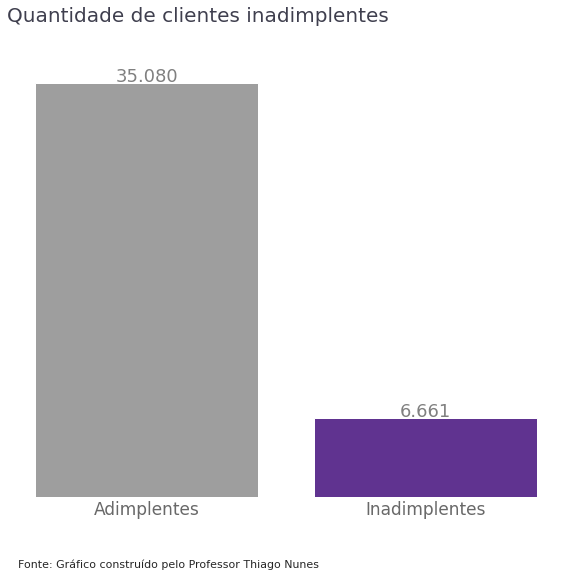

In [88]:
# criando o gráfico
fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(df['target_default'], ax=ax, palette=['#9E9E9E','#5f249f'])
ax.set_title('Quantidade de clientes inadimplentes', loc='left', pad=40, fontdict={'fontsize':20}, color='#3f3f4e');
ax.set_frame_on(False)
ax.set_xticklabels(['Adimplentes','Inadimplentes'])
ax.tick_params(axis='x', length=0, labelsize=17, colors='dimgrey')
ax.set_xlabel(' ')
ax.get_yaxis().set_visible(False)

#incluindo os rótulos
for retangulo in ax.patches:
  ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height() + 100,
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'),
          ha = 'center',
          fontsize=18, color='grey')

# Rodapé
ax.text(
    -0.46,
    -6000,
    "Fonte: Gráfico construído pelo Professor Thiago Nunes"
)

#plotando o gráfico
plt.show()

Como os inadimplentes são uma minoria na empresa, provavelmente realizaremos um balanceamento dos dados para não criarmos um viés.

## 3. Preparação dos dados


A preparação dos dados é uma etapa extremamente importante na implementação de modelos de Machine Learning, pois ela pode alterar significativamente o desempenho do modelo. 

A preparação dos dados envolve a análise e limpeza da base de dados para que os valores sejam adequados para alimentar o modelo com informações relevantes. É necessário verificar se existem valores ausentes, outliers, variáveis irrelevantes e outros fatores que possam afetar negativamente o desempenho do modelo. Ao realizarmos essas tarefas antes de treinar um modelo, poderemos obter resultados mais precisos e melhorias no resultado final.

Nesta etapa faremos a preparação dos dados da Nubank com a seguinte sequência:
* 3.1 Removendo as features irrelevantes;
* 3.2 Substituindo os valores por Nan;
* 3.3 Tratando dados ausentes;
* 3.4 Tratando Outliers;
* 3.5 Separando as variáveis categóricas e numéricas;
    * 3.5.1 Label Encoding para as variáveis binárias;
    * 3.5.2 Label Encoding para as variáveis com mais de 2 classes;
* Extrair e codificar as colunas categóricas.



### 3.1 Removendo as features irrelevantes

In [89]:
# Copiando o DataFrame inicial para um novo DataFrame em que será removido as variáveis irrelevantes
df_clean = df.copy()

# Removendo as variáveis irrelevantes
drop_df_clean = ['ids','external_data_provider_credit_checks_last_2_year',
            'channel','external_data_provider_first_name','profile_phone_number',
            'target_fraud','lat_lon','application_time_applied']
df_clean.drop(labels=drop_df_clean, axis=1, inplace=True)

# Checando o novo DataFrame sem as variáveis selecionadas
df_clean.head()


,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,email,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,marketing_channel,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent
0,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,444,outlook.com,2,0.0,51.0,645,Invite-email,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...
1,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,346,gmail.com,1,0.0,17.0,243,Radio-commercial,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...
2,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,6,gmail.com,2,NaN,9.0,65,Waiting-list,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...
3,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,NaN,1.0,0.0,19.0,19.0,406,spgov.com,3,NaN,38.0,815,Waiting-list,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...
4,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,11.0,NaN,240,gmail.com,2,1.0,46.0,320,Invite-email,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...


A remoção de variáveis irrelevantes é uma etapa importante no processo de análise de dados. Esta etapa ajuda a melhorar o desempenho dos modelos, reduzindo o ruído e evitando sobreajustes. Além disso, pode simplificar os resultados da análise tornando-os mais fáceis de interpretar.

Quando se trata das variáveis irrelevantes na ciência de dados, elas são definidas como aquelas que não têm qualquer valor para a análise em questão. Isso acontece porque elas não contribuem para a previsão ou explicação dos resultados, e podem até mesmo interferir na precisão das estimativas.

### 3.2 Substituindo valores discrepantes por NaN
Como vimos, existem variáveis que possuem valores semelhantes a dados ausentes, como é o caso de valores mínimos negativos (-999) e valores do tipo `inf`, então vamos convertê-los em `NaN` e na próxima etapa fazer o tratamento desses dados ausentes.

In [90]:
# Substituindo os valores inf por NaN na variável reported_income
df_clean['reported_income'] = df_clean['reported_income'].replace(np.inf, np.nan)

# Substituindo os valores negativos -999 por NaN na variável external_data_provider_email_seen_before
df_clean.loc[df_clean['external_data_provider_email_seen_before'] == -999.0,
           'external_data_provider_email_seen_before'] = np.nan

# Checando o resumo estatístico da variável reported_income
df_clean['reported_income'].describe()

count    4.493300e+04
mean     1.032542e+13
std      2.559648e+14
min      4.030000e+02
25%      5.085600e+04
50%      1.016300e+05
75%      1.511870e+05
max      6.355500e+15
Name: reported_income, dtype: float64

In [91]:
# Checando o resumo estatístico da variável external_data_provider_email_seen_before
df_clean['external_data_provider_email_seen_before'].describe()

count    42121.000000
mean        28.048456
std         17.939836
min         -1.000000
25%         12.000000
50%         28.000000
75%         44.000000
max         59.000000
Name: external_data_provider_email_seen_before, dtype: float64

### 3.3 Tratando os dados ausentes (`NaN`)

Tratar valores ausentes é uma parte essencial da ciência de dados. Os dados são um dos principais insumos para qualquer análise e, portanto, não podem conter lacunas ou inconsistências que afetem os resultados finais. 

Como visto anteriormente no tópico 2.5:

* A variável alvo para este projeto, `target_default`: possui 7% de dados ausentes, como substituir esses valores pode influenciar a decisão do modelo, vamos optar por remover estes dados, uma vez que são poucos dados ausentes;

* Para variáveis numéricas vamos substituir os valores ausentes pela mediana, que não sofre muita influência de outliers, as variáveis são:
 

* Para variáveis categóricas, substituiremos pelo valor mais frequente, que são as variáveis:
 

 Para substituir os valores ausentes vamos utilizar o método `SimpleImputer`:
 

In [92]:
# Remover os valores ausentes da variável alvo 
df_clean.dropna(subset=['target_default'], inplace=True)

# Substituir os valores nas variáveis numéricas
num_var = df_clean.select_dtypes(exclude='object').columns

imputer_num = SimpleImputer(missing_values=np.nan, strategy='median')
imputer_num = imputer_num.fit(df_clean.loc[:,num_var])
df_clean.loc[:,num_var] = imputer_num.transform(df_clean.loc[:,num_var])

# Substituir os valores nas variáveis categóricas
cat_var = df_clean.select_dtypes(include='object').columns

imputer_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer_cat = imputer_cat.fit(df_clean.loc[:,cat_var])
df_clean.loc[:,cat_var] = imputer_cat.transform(df_clean.loc[:,cat_var])

Verificando se os valores ausentes foram trocados



In [93]:
# Checando se os dados foram preenchidos
print(f' O dataset possui: {df_clean.isnull().sum().max()} valores ausentes')

 O dataset possui: 0 valores ausentes


O tratamento adequado dos valores ausentes nos dados é essencial para obter resultados precisos, pois os algoritmos usados ​​para análise de dados são sensíveis à presença desse tipo de informação incompleta. 

### 3.4 Tratando os Outliers

Outliers são valores extremos presentes em um conjunto de dados, podendo ocorrer tanto para valores superiores e inferiores ao padrão. Eles podem ser resultado de erros na coleta dos dados, falhas nos processos, entre outras possíveis causas. Os outliers interferem diretamente nas análises realizadas com os dados, sendo necessário identificar seus motivos e corrigir esses problemas antes da realização desses estudos. Além disso, é importante tomar cuidado ao trabalhar com dados que possuam outliers, pois eles podem distorcer as conclusões obtidas. Por exemplo, um outlier alto pode levar a uma estimativa incorreta da média dos dados.

Algumas das variáveis que aparentavam possuir outliers são:
* `score_3`
* `score_6`
* `credit_limit`

Analisando o boxplot delas e caso seja confirmado a presença de outliers, será necessário analisar com bastante atenção o impacto delas no nosso modelo.

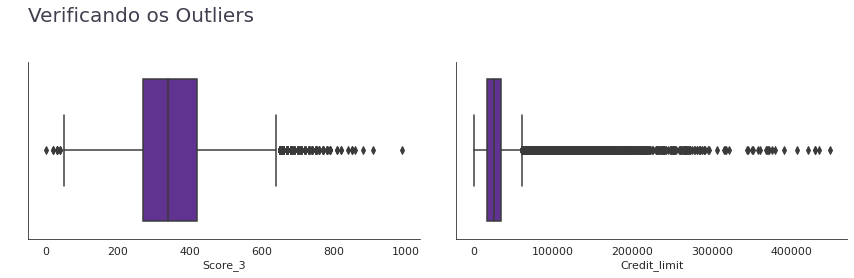

In [94]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Setando as cores padrão
sns.set_palette(cores.values())

# Criando o BOXPLOT
sns.boxplot(df_clean['score_3'], ax=ax[0], color= '#5f249f') 
sns.boxplot(df_clean['credit_limit'], ax=ax[1],  color= '#5f249f') # Limite de crédito

# Remover spines da direira e superior

# score_3
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

# credit_limit
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)


ax[0].set_title('Verificando os Outliers', loc='left', pad=40, fontdict={'fontsize':20}, color= '#3f3f4e');

# Colocando as legendas

# score_3
ax[0].set_xlabel('Score_3')
ax[0].set_ylabel(' ')

# credit_limit
ax[1].set_xlabel('Credit_limit')
ax[1].set_ylabel(' ')

# Plotando o gráfico
plt.tight_layout();

Os boxplots comprovam a existência de outliers, onde cada ponto além dos limites do boxplot representam as outliers.

Como confirmado a presença de outliers, vamos avançar para a etapa de tratamento.

Primeiramente iremos calcular os limites superiores e inferiores de cada variável com a regra do IQR Score:

In [95]:
# Definindo a função para o limite superior
def limite_sup(x):
  # Calculando o IQR Score
  q1 = x.quantile(.25) # Primeiro Quartil(25%)
  q3 = x.quantile(.75) # Terceiro Quartil(75%)
  IQR_Score = q3 - q1

  # Definindo os limites superiores
  superior = q3 + 1.5 * IQR_Score
 
  return superior

# Definindo a função para o limite inferior
def limite_inf(x):
  # Calculando o IQR Score
  q1 = x.quantile(.25) # Primeiro Quartil(25%)
  q3 = x.quantile(.75) # Terceiro Quartil(75%)
  IQR_Score = q3 - q1

  # Definindo os limites inferiores
  inferior = q1 - 1.5 * IQR_Score
 
  return inferior

#### 3.4.1 Substituindo outliers

Vamos converter as outliers pelos valores dos limites superiores e inferiores obtidos pelo método IQR Score:

In [96]:
# Define a função lambda para substituir valores no intervalo do limite superior e inferior
replace_lambda = replace_outliers = lambda x: np.where(x > limite_sup(x), limite_sup(x), np.where(x < limite_inf(x), limite_inf(x), x))

In [97]:
# Aplica a função lambda a todas as variáveis numéricas do DataFrame usando apply
df_clean[df_clean.select_dtypes(include=['number']).columns] = df_clean.select_dtypes(include=['number']).apply(replace_lambda)

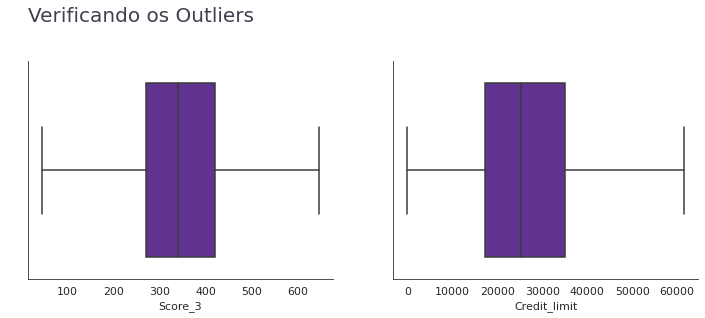

In [98]:
# Verificando a substituição de outliers
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Setando as cores padrão
sns.set_palette(cores.values())

# Criando o BOXPLOT
sns.boxplot(df_clean['score_3'], ax=ax[0], color= '#5f249f') 
sns.boxplot(df_clean['credit_limit'], ax=ax[1],  color= '#5f249f') # Limite de crédito

# Remover spines da direira e superior

# score_3
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

# credit_limit
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)


ax[0].set_title('Verificando os Outliers', loc='left', pad=40, fontdict={'fontsize':20}, color= '#3f3f4e');

# Colocando as legendas

# score_3
ax[0].set_xlabel('Score_3')
ax[0].set_ylabel(' ')

# credit_limit
ax[1].set_xlabel('Credit_limit')
ax[1].set_ylabel(' ')

# Visualizando
plt.show()


#### 3.4.2 Verificando perdas na substituição
Os valores foram convertidos com sucesso, mas ainda é necessário mais uma análise, dessa vez, vamos checar se houve perdas de informação:

In [99]:
print('Quantidade de entradas antes das substituições: ', df.shape[0])
print('Quantidade de entradas depois das substituições: ', df_clean.shape[0])

Quantidade de entradas antes das substituições:  45000
Quantidade de entradas depois das substituições:  41741


Tivemos uma perda de dados mas não por causa do método IQR score, mas pelo fato da remoção de features irelevantes no item 3.1.

### 3.5 Separando as variáveis categóricas das numéricas do dataset

In [100]:
# Separando as variáveis binárias do dataset
variavel_binaria = df_clean.nunique()[df_clean.nunique() == 2].keys().tolist()

# Agrupando as variáveis numéricas
variavel_numerica = [col for col in df_clean.select_dtypes(['int', 'float']).columns.tolist() if col not in variavel_binaria]

# Agrupando as variáveis categóricas
variavel_categorica = [col for col in df_clean.columns.tolist() if col not in variavel_binaria + variavel_numerica]


#### 3.5.1 Label Encoding para as variáveis binárias
Um conjunto de dados pode conter vários tipos de valores, às vezes consiste em valores categóricos. Então, para usar esses valores categóricos para programação eficientemente criamos variáveis falsas. Uma variável fictícia é uma variável binária que indica se uma variável categórica separada assume um valor específico.

transformaremos os dados em binários, 0 ou 1

In [101]:
# Label Encoding para as variáveis binárias
label_encoding = LabelEncoder()
for i in variavel_binaria:
  df_clean[i] = label_encoding.fit_transform(df_clean[i])

#### 3.5.2 Label Encoding para as variáveis com mais de 2 classes

Para as variáveis categóricas, temos que analisar mais profundamente e buscar entender como estão distribuídos os dados, para então decidirmos a melhor maneira de tratá-las.

Sabendo disso, vamos identificar as variáveis categóricas do nosso dataset:


In [102]:
df_clean.select_dtypes('object').columns

Index(['score_1', 'score_2', 'reason', 'state', 'zip', 'job_name',
       'real_state', 'email', 'marketing_channel', 'shipping_state',
       'profile_tags', 'user_agent'],
      dtype='object')

As variáveis categóricas são:
* `score_1`;
* `score_2`;
* `reason`;
* `state`;
* `real_state`;
* `email`;
* `marketing_channel`;
* `shipping_state`.

Como não temos nenhuma documentação sobre essas variáveis, irei assumir que em nenhuma delas existe uma correlação dos valores, ou seja, irei adotar todas essas variáveis categóricas como nominais.

Adotando-as como nominais, vamos checar a quantidade de valores únicos que existem em cada uma:


In [103]:
# Checando a quantidade de valores únicos para as variáveis categóricas

for i in dict(df_clean.select_dtypes('object').nunique()).items():
  variavel = i[0]
  caracteres = '_'*(30 - len(variavel))

  tipo = i[1]
  print(f'A variável [{variavel}]{caracteres} possui {tipo} valores únicos.')

A variável [score_1]_______________________ possui 7 valores únicos.
A variável [score_2]_______________________ possui 35 valores únicos.
A variável [reason]________________________ possui 14260 valores únicos.
A variável [state]_________________________ possui 50 valores únicos.
A variável [zip]___________________________ possui 823 valores únicos.
A variável [job_name]______________________ possui 30543 valores únicos.
A variável [real_state]____________________ possui 5 valores únicos.
A variável [email]_________________________ possui 6 valores únicos.
A variável [marketing_channel]_____________ possui 9 valores únicos.
A variável [shipping_state]________________ possui 25 valores únicos.
A variável [profile_tags]__________________ possui 24458 valores únicos.
A variável [user_agent]____________________ possui 297 valores únicos.


### 3.6 Extrair e codificar as colunas categóricas

In [104]:
# extrair as colunas categóricas
cat_cols = df_clean.select_dtypes('object').columns

# codificar cada coluna categórica
for col in cat_cols:
  df_clean[col+'_encoded'] = LabelEncoder().fit_transform(df_clean[col])
  df_clean.drop(col, axis=1, inplace=True)

## 4. Construindo, treinando e avaliando o modelo

* 4.1 Criando uma cópia do dataframe;
* 4.2 Separando a variável alvo;
* 4.3 Dividindo os dados de treino e teste;
* 4.4 Criando um Cross-validation e uma baseline;
* 4.5 Feature Scaling - Padronização;
* 4.6 Balanceando os dados;
* 4.7 Otimizando os hiperparâmetros com Grid Search;
* 4.8 Verificando o desempenho do modelo

### 4.1 Criando uma cópia do dataframe

In [105]:
# Criando uma cópia do dataframe
df_copia = df_clean.copy()

### 4.2 Separar a variável alvo
Nesta etapa é necessário separar a variável alvo "target_default", essa é a variável que faremos a predição.

In [106]:
# Separando a variável alvo

X = df_copia.drop('target_default', axis = 1)
y = df_copia['target_default']

### 4.3 Dividindo os dados em treino e teste

Para agrupar os dados de treino e teste, vamos dividir os dados, sendo 70% para treino e 30% para teste.

In [107]:
# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### 4.4 Criando um Cross-validation e uma baseline

Cross-Validation (CV) é uma técnica usada para avaliar um modelo de aprendizado de máquina e testar seu desempenho (ou precisão). Envolve reservar uma amostra específica de um conjunto de dados no qual o modelo não é treinado. Posteriormente, o modelo é testado nesta amostra para avaliá-lo.

A validação cruzada é usada para proteger um modelo de superequipar, especialmente se a quantidade de dados disponíveis for limitada. Também é conhecido como estimativa de rotação ou teste fora da amostra e é usado principalmente em configurações onde o alvo do modelo é a previsão.

obs:  Um modelo é considerado "superequipado" se modelar os dados de treinamento tão bem que afeta negativamente seu desempenho em novos dados.

Este procedimento de reamostragem também é usado para comparar diferentes modelos de aprendizado de máquina e determinar o quão bem eles funcionam para resolver um determinado problema. Em outras palavras, a validação cruzada é um método usado para avaliar a habilidade dos modelos de aprendizagem de máquina.

In [108]:
# construindo função de avaliação do baseline
def val_model(X, y, clf, quite=False):
    """
    Realiza cross-validation com os dados de treino para determinado modelo.

    # Arguments
        X: DataFrame, contém as variáveis independetes.
        y: Series, vetor contendo a variável alvo.
        clf: modelo classificador do Scikit-learn.
        quite: bool, indicando se a função deve imprimir os resultados ou não.

    # Returns
        float, média dos scores da cross-validation.
    """
    
    X = np.array(X)
    y = np.array(y)

    pipeline = make_pipeline(StandardScaler(), clf)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy')

    if quite == False:
        print("Acurácia: {:.4f} (+/- {:.2f})".format(scores.mean(), scores.std()))
    
    return scores.mean()

# criar baseline e ver desempenho
rf = RandomForestClassifier()
score_baseline = val_model(X_train, y_train, rf)


Acurácia: 0.8375 (+/- 0.00)


### 4.5 Feature Scaling
É um passo importante para padronizar os recursos independentes presentes no conjunto de dados. Padronizando, queremos dimensionar os recursos para trazê-los na mesma faixa. Existem várias técnicas para realizar o dimensionamento de recursos. Mas, primeiro, vamos entender por que é importante fazê-lo.

Em um cenário geral, cada característica no conjunto de dados tem algumas unidades e magnitude. Suponha que tenhamos duas características : Idade e Salário. O modelo de machine learning dará alta importância a características que têm alta magnitude e baixa importância para características de baixa magnitude, independentemente da unidade dos valores, isso prejudica o nosso modelo de ML.

4.7.1 Padronizando os dados

Padronização é quando as features sofrem uma mudança de escala, e passa a ter as propriedades de uma distribuição normal com média $\mu = 0$ e desvio padrão $\sigma = 1$.

Na padronização, os z-scores são calculados da seguinte maneira:

\begin{align}
  z = \frac{x-\mu}{\sigma}   \space onde:\space  \space \sigma = \sqrt{\frac{(x-\mu)^2}{n}}
\end{align}
<br>
<center><img src = "http://saylordotorg.github.io/text_introductory-statistics/section_09/e7a042db29b39bb94416c06789301faa.jpg" width=40%></center><br>

  Onde:

> <ul type="None">
> <li>$z$: Z-Score</li>
> <li>$x$: Dados retirados do dataset</li>
> <li>$\mu$: média dos dados</li>
> <li>$\sigma$: Desvio padrão dos dados</li>
> <li>$n$: Número de observações

In [109]:
#  padronizar os  dados,
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

### 4.6 Balanceando os dados

Dados Desbalanceados podem ser definidos pela pequena incidência de uma categoria dentro de um dataset (classe minoritária) em comparação com as demais categorias (classes majoritárias). Na maioria dos casos, isso faz com que tenhamos muitas informações a respeito das categorias mais incidentes, e menos das minoritárias, o que pode, em muito casos, interferir no modelo de Machine Learning.

In [110]:
# Balanceando os dados
rus = RandomUnderSampler(random_state=11)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

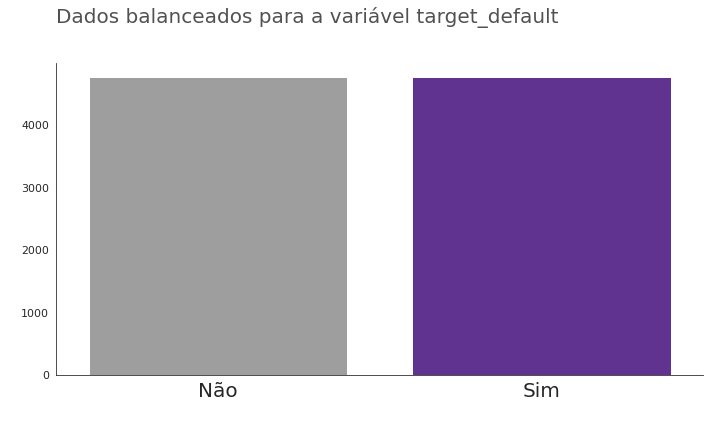

In [112]:
# plotar gráfico de barras para as Classes
fig, ax = plt.subplots(figsize=(10, 6), dpi = 72)

# plotar a nova distribuição da variável Churn
sns.countplot(y_train_rus)

# Configurações dos gráficos
# ax.set_frame_on(False)
ax.set_title('Dados balanceados para a variável target_default', loc='left', pad=40, fontdict={'fontsize':20}, color='#515151');

# Limite do eixo y
plt.ylim()

# ax.get_yaxis().set_visible(False)
ax.set_xlabel(' ')
ax.set_ylabel(' ')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


# Colocando as legendas
plt.xticks([0, 1], ['Não', 'Sim'], fontsize = 20)

# mostrar grafico e subplots
plt.tight_layout();

### 4.6 Aplicando o cross-validation em alguns modelos

Aplicando a validação cruzada a vários modelos, a fim de identificar o seu desempenho e escolher o(s) melhor(es). Novamente, serão utilizados apenas dados de treino. Os modelos escolhidos são:

* Random Forest
* Decision Tree
* Stochastic Gradient Descent
* SVC
* Regressão Logística
* XGBClassifier
* LightGBM

In [115]:
# instanciar=ndo os modelos

rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
svc = SVC()
lr = LogisticRegression()
xgb = XGBClassifier()
model = []
recall = []
# avaliar o desempenho (recall)
for clf in (rf, dt, svc, lr, xgb):
    model.append(clf.__class__.__name__)
    recall.append(val_model(X_train_rus, y_train_rus, clf, quite=True))

pd.DataFrame(data=recall, index=model, columns=['Recall'])

,Recall
RandomForestClassifier,0.639357
DecisionTreeClassifier,0.559106
SVC,0.623160
LogisticRegression,0.621794
XGBClassifier,0.633781


### 4.7 Otimização dos hiperparâmetros com Grid Search

O XGBoost tem muitos parâmetros. Alguns têm mais impacto na qualidade do modelo, outros menos. Uma boa prática é definir a taxa de aprendizado e o número de estimadores, ajustar outros parâmetros e, finalmente, verificar outras taxas de aprendizado.

Abaixo, ajustando o número de estimadores. O modelo é instanciado com "learning_rate=0.1".

In [116]:
xgb = XGBClassifier(learning_rate=0.1)

param_grid = {
 'n_estimators':range(0,1000,50),
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

# ver resultados
print(f"Melhor: {grid_result.best_score_} para {grid_result.best_params_}")

Melhor: 0.642203449800973 para {'n_estimators': 200}


Para o número de estimadores igual a 50, faremos a busca pelos parâmtros max_depth e min_child_weight.

In [117]:
xgb = XGBClassifier(learning_rate=0.1, n_estimators=50)

param_grid = {
 'max_depth':range(1,8,1),
 'min_child_weight':range(1,5,1)
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

# ver resultados
print(f"Melhor: {grid_result.best_score_} para {grid_result.best_params_}")

Melhor: 0.6472339672711189 para {'max_depth': 5, 'min_child_weight': 1}


Obtidos os valores de max_depth=1 e min_child_weight=1, será otimizado o parâmetro gamma.

In [118]:
xgb = XGBClassifier(learning_rate=0.1, n_estimators=50, max_depth=1, min_child_weight=1)

param_grid = {
 'gamma':[i/10.0 for i in range(0,5)]
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

# ver resultados
print(f"Melhor: {grid_result.best_score_} para {grid_result.best_params_}")

Melhor: 0.6032750995134896 para {'gamma': 0.0}


Finalizando, obtido gamma=0, será realizado quatro testes para a learning_rate e ver qual destes testes oferece o melhor resultado.

In [119]:
xgb = XGBClassifier(n_estimators=50, max_depth=1, min_child_weight=1, gamma=0.0)

param_grid = {
 'learning_rate':[0.001, 0.01, 0.1, 1]
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

# ver resultados
print(f"Desempenho: {grid_result.best_score_} para {grid_result.best_params_}")

Desempenho: 0.6390358248562582 para {'learning_rate': 1}


Fato é que uma taxa de aprendizado menor, conseguiu melhorar o desempenho do modelo XGBoost, considerando recall como métrica. 

Agora, treina-se o modelo em cima do dataset de treino completo, e verifica-se o desempenho final em cima dos dados de teste, no seu primeiro contato com esse sub-conjunto que havia sido preservado.

### 4.8 Verificando o desempenho do modelo

              precision    recall  f1-score   support

           0       0.88      0.70      0.78     10616
           1       0.22      0.48      0.30      1907

    accuracy                           0.66     12523
   macro avg       0.55      0.59      0.54     12523
weighted avg       0.78      0.66      0.71     12523

AUC: 0.5893



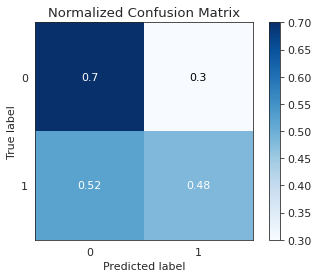

In [126]:
# modelo final
xgb = XGBClassifier(learning_rate=0.001 , n_estimators=50, max_depth=1, min_child_weight=1, gamma=0.0)
xgb.fit(X_train_rus, y_train_rus)

# fazer a previsão
X_test = scaler.transform(X_test)
y_pred = xgb.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred))

# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

# plotar matriz de confusão
plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

Existem várias métricas que podem ser usadas para avaliar a performance de um modelo de machine learning para detecção de risco de crédito em um banco. Algumas das mais comuns são:

* Acurácia (Accuracy): a proporção de previsões corretas em relação ao total de previsões. No entanto, a acurácia pode ser enganosa em problemas de desequilíbrio de classe, em que a classe de interesse (por exemplo, inadimplentes) é muito menor do que a classe majoritária (por exemplo, bons pagadores).

* Precisão (Precision): a proporção de verdadeiros positivos (inadimplentes corretamente identificados) em relação ao total de exemplos classificados como inadimplentes (verdadeiros positivos + falsos positivos).

* Revocação (Recall): a proporção de verdadeiros positivos em relação ao total de exemplos que realmente são inadimplentes (verdadeiros positivos + falsos negativos).

* F1-score: a média harmônica entre precisão e revocação, que dá mais peso a valores baixos. É uma métrica que leva em consideração tanto a precisão quanto a revocação, e é uma boa escolha quando há um equilíbrio entre as classes.

Em geral, a escolha da melhor métrica depende das necessidades do banco. Se o objetivo é minimizar o número de falsos positivos (classificar erroneamente um bom pagador como inadimplente), então a precisão pode ser mais importante. Se o objetivo é minimizar o número de falsos negativos (classificar erroneamente um inadimplente como bom pagador), então a revocação pode ser mais importante. Se houver um equilíbrio entre esses objetivos, o F1-score pode ser a melhor escolha.

## 5. Considerações finais

Por fim, é importante destacar que a análise do risco de crédito permite também às empresas fortalecerem sua imagem no mercado. Isso acontece porque as organizações passam a ter um processo transparente para avaliar os potenciais clientes e fornecedores com quem irão trabalhar. Esta prática contribui para mostrar que são tomadas medidas adequadas para garantir uma relacionamento saudável entre ambos os lados da transacionalidade financeira, o que melhora sua reputação junto à sociedade em geral.
Tivemos boas metricas apesar da diminuição da acurácia, porém as métricas de precision e recall tiveram um aumento interessante.

Fique a vontade para modificar este projeto!